## Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

data = pd.read_csv('../input/advanced-dls-spring-2021/train.csv')
data.head(10)

/kaggle/input/advanced-dls-spring-2021/submission.csv
/kaggle/input/advanced-dls-spring-2021/train.csv
/kaggle/input/advanced-dls-spring-2021/test.csv


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [3]:
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"],errors ='coerce')

In [4]:
data.isna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5278,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isna().mean() # появились nan'ы в TotalSpent, избавимся от них

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.001704
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.000000
dtype: float64

In [6]:
data.TotalSpent.fillna(data.TotalSpent.median(), inplace=True) #заполняем пропуски медианным значением столбца
data.isna().mean() #проверяем наличие nan'ов

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

In [7]:
data.info() #проверяем наличие nan'ов ещё раз

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных

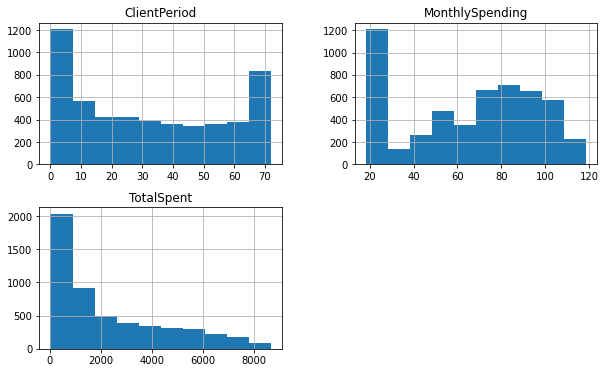

In [9]:
data.hist(column=num_cols, figsize=(10, 6))
None

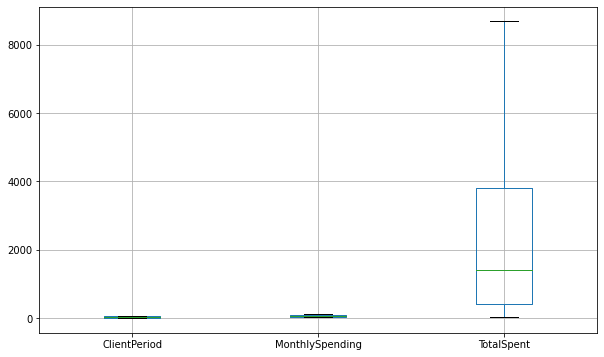

In [10]:
data.boxplot(column=num_cols, figsize=(10, 6)) #построим boxplot
None

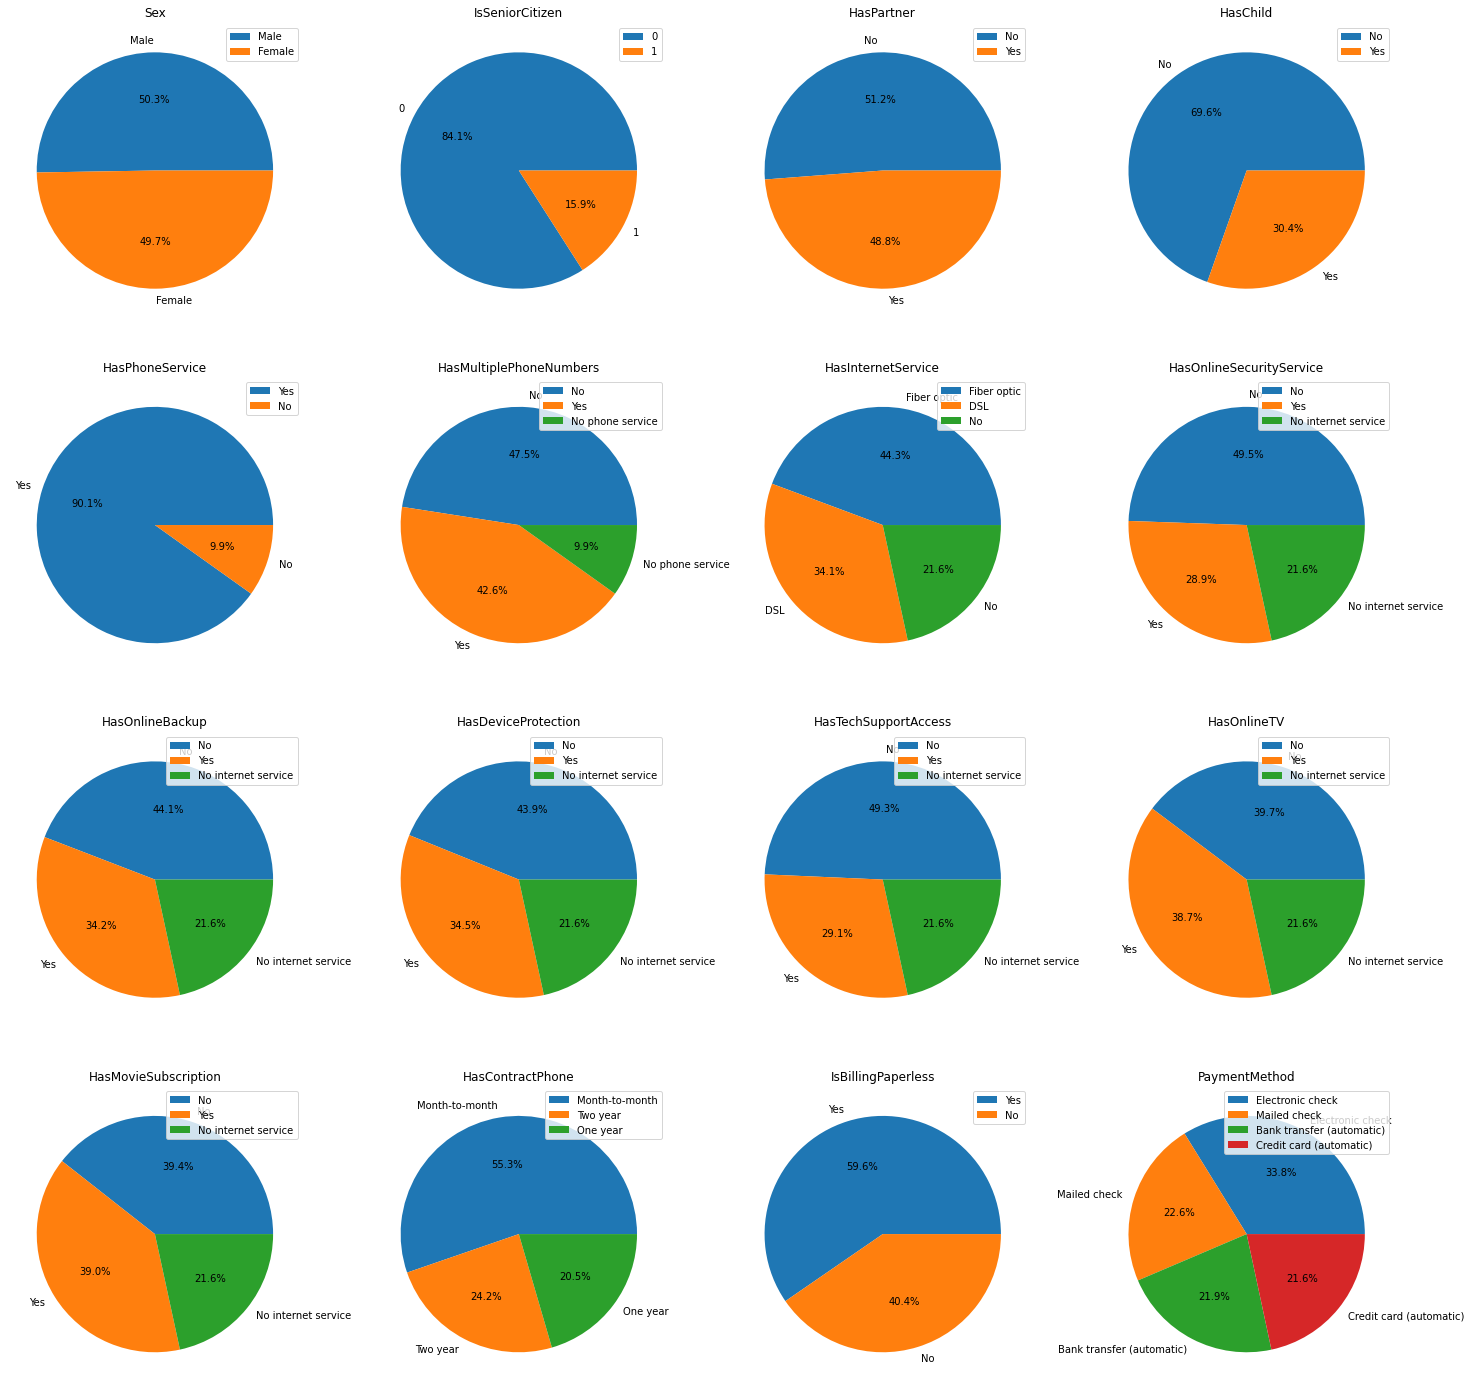

In [11]:
figure = plt.figure(figsize =(25, 25)) #построим диаграммы для категориальных признаков
for i in range(len(cat_cols)):
  plt.subplot(4,4,i+1)
  plt.pie(data[cat_cols[i]].value_counts(), labels = data[cat_cols[i]].value_counts().index, autopct='%1.1f%%')
  plt.title(cat_cols[i])
  plt.legend()

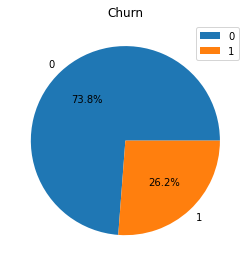

In [12]:
plt.figure(figsize =(20, 20))
data_i=data[target_col].value_counts()
plt.subplot(4,4,1)
plt.pie(data_i, labels = data_i.index, autopct='%1.1f%%')
plt.title(target_col)
plt.legend()
None

In [13]:
# по диаграмме видно, что данные сбалансированы

In [14]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2) #корелляция в норме

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.00,0.25,0.83,0.01,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.18
TotalSpent,0.83,0.65,1.00,0.09,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.16
Churn,-0.35,0.18,-0.20,0.16,1.00


## Линейные модели

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [16]:
X = pd.concat([data[num_cols], pd.get_dummies(data[cat_cols], drop_first=True)], axis=1) #делаем one-hot-encoding

In [17]:
pca = StandardScaler()
X = pca.fit_transform(X)

In [18]:
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
lr.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score

In [21]:
print(f'R^2: {r2_score(lr.predict(X_test), y_test)}')
print(f'MSE: {mean_squared_error(lr.predict(X_test), y_test)}')

R^2: -0.26653883029721936
MSE: 0.21044663133989402


In [22]:
cls = make_pipeline(StandardScaler(),LogisticRegression())#модель логистической регресии 
param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
search = GridSearchCV(cls, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'logisticregression__C': 10.0}
0.8505026685605749
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=10.0))])


## Градиентный бустинг

In [23]:
import catboost 
from catboost import CatBoostClassifier

In [24]:
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
catboost_ = catboost.CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)
catboost_.fit(X_train, y_train)

In [26]:
roc_auc_score(y_train, catboost_.predict_proba(X_train)[:, 1]) #проверяем score на train'е

0.9008509688103061

In [27]:
roc_auc_score(y_test, catboost_.predict_proba(X_test)[:, 1]) #проверяем score на test'е

0.8207237246088472

In [28]:
params = {'iterations':[200, 400, 600, 800], 'learning_rate':[0.1, 0.2], 'depth':[2, 4, 6, 8, 10]} #создаём гиперпараметры

model_with_grid = catboost.CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)
best_model = model_with_grid.grid_search(params, X_train, y=y_train)


bestTest = 0.3893077881
bestIteration = 119

0:	loss: 0.3893078	best: 0.3893078 (0)	total: 850ms	remaining: 33.1s

bestTest = 0.3921074432
bestIteration = 83

1:	loss: 0.3921074	best: 0.3893078 (0)	total: 1.67s	remaining: 31.7s

bestTest = 0.3893077881
bestIteration = 119

2:	loss: 0.3893078	best: 0.3893078 (0)	total: 3.22s	remaining: 39.7s

bestTest = 0.3921074432
bestIteration = 83

3:	loss: 0.3921074	best: 0.3893078 (0)	total: 4.64s	remaining: 41.8s

bestTest = 0.3893077881
bestIteration = 119

4:	loss: 0.3893078	best: 0.3893078 (0)	total: 6.88s	remaining: 48.2s

bestTest = 0.3921074432
bestIteration = 83

5:	loss: 0.3921074	best: 0.3893078 (0)	total: 9.25s	remaining: 52.4s

bestTest = 0.3893077881
bestIteration = 119

6:	loss: 0.3893078	best: 0.3893078 (0)	total: 12.2s	remaining: 57.6s

bestTest = 0.3921074432
bestIteration = 83

7:	loss: 0.3921074	best: 0.3893078 (0)	total: 15.3s	remaining: 1m 1s

bestTest = 0.3922507689
bestIteration = 118

8:	loss: 0.3922508	best: 0.3893078 (0)

In [29]:
y_train_pred = catboost_.predict_proba(X_train)[:, 1]
y_test_pred = catboost_.predict_proba(X_test)[:, 1]

In [30]:
print(f'Best train score: {roc_auc_score(y_train, y_train_pred)}')
print(f'Best test score: {roc_auc_score(y_test, y_test_pred)}')
print(f'Best params: {best_model["params"]}')

Best train score: 0.9008509688103061
Best test score: 0.8207237246088472
Best params: {'depth': 2, 'iterations': 200, 'learning_rate': 0.1}


In [31]:
roc_auc_score(y_train, model_with_grid.predict_proba(X_train)[:, 1])

0.8652033458509362

# Предсказания

In [32]:
best_model = CatBoostClassifier(iterations=200, depth=2, learning_rate = 0.1)

In [33]:
best_model.fit(X_train, y_train, cat_features=cat_cols)

0:	learn: 0.6593763	total: 3.21ms	remaining: 640ms
1:	learn: 0.6211133	total: 8.49ms	remaining: 841ms
2:	learn: 0.5957959	total: 11.9ms	remaining: 781ms
3:	learn: 0.5689225	total: 14.8ms	remaining: 727ms
4:	learn: 0.5460989	total: 17.9ms	remaining: 700ms
5:	learn: 0.5204758	total: 21ms	remaining: 680ms
6:	learn: 0.5039264	total: 24.2ms	remaining: 669ms
7:	learn: 0.4887359	total: 27.5ms	remaining: 660ms
8:	learn: 0.4783257	total: 30.2ms	remaining: 641ms
9:	learn: 0.4691525	total: 33ms	remaining: 628ms
10:	learn: 0.4635895	total: 35.9ms	remaining: 617ms
11:	learn: 0.4588959	total: 38.5ms	remaining: 603ms
12:	learn: 0.4518545	total: 41.3ms	remaining: 594ms
13:	learn: 0.4478034	total: 44.2ms	remaining: 588ms
14:	learn: 0.4438482	total: 47.3ms	remaining: 584ms
15:	learn: 0.4400723	total: 50.3ms	remaining: 579ms
16:	learn: 0.4370227	total: 53.5ms	remaining: 576ms
17:	learn: 0.4342612	total: 56.8ms	remaining: 574ms
18:	learn: 0.4320337	total: 59.6ms	remaining: 568ms
19:	learn: 0.4297729	total

In [34]:
X_test = pd.read_csv('../input/advanced-dls-spring-2021/test.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
submission = pd.read_csv('../input/advanced-dls-spring-2021/submission.csv')
submission['Churn'] = model_with_grid.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)